<a href="https://colab.research.google.com/github/vfunnny2000/NN/blob/main/HW_3/lesson_3_NN_HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-preprocessing

In [2]:
import keras_preprocessing

In [ ]:
!pip3 install tensorflow

In [14]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import tensorflow
import keras.utils as image
from keras.optimizers import Ftrl
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adagrad
# from tensorflow.keras.preprocessing import image

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

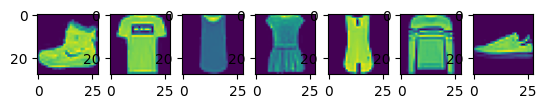

In [18]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [19]:
input_shape = (28, 28, 1)

In [20]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dropout(0.5),  # Добавляем слой Dropout с коэффициентом 0.5
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [21]:
model_1.compile(optimizer=Ftrl(learning_rate=0.01),  # Задаем параметры learning rate
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [23]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 83s 43ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 2.3026 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
CPU times: user 10min 7s, sys: 15.5 s, total: 10min 23s
Wall time: 7min 24s


In [24]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dropout(0.5),
      Dense(10, activation = 'softmax')
      ] )

In [25]:
model_2.compile(optimizer=Ftrl(learning_rate=0.01),  # Задаем параметры learning rate для Ftrl
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [26]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3169 - accuracy: 0.4992 - val_loss: 0.8603 - val_accuracy: 0.6826
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9580 - accuracy: 0.6514 - val_loss: 0.7192 - val_accuracy: 0.7537
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8679 - accuracy: 0.6884 - val_loss: 0.6665 - val_accuracy: 0.7693
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8219 - accuracy: 0.7033 - val_loss: 0.6371 - val_accuracy: 0.7786
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7969 - accuracy: 0.7142 - val_loss: 0.6124 - val_accuracy: 0.7884
CPU times: user 35.8 s, sys: 1.83 s, total: 37.6 s
Wall time: 42.1 s


In [27]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dropout(0.5),
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ])

In [28]:
model_3.compile(optimizer=Adagrad(learning_rate=0.01),  # Задаем параметры learning rate для Adagrad
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.9376 - accuracy: 0.6506 - val_loss: 0.5414 - val_accuracy: 0.7960
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.6510 - accuracy: 0.7562 - val_loss: 0.4794 - val_accuracy: 0.8163
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5881 - accuracy: 0.7786 - val_loss: 0.4397 - val_accuracy: 0.8394
Epoch 4/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.5504 - accuracy: 0.7973 - val_loss: 0.4176 - val_accuracy: 0.8472
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.5152 - accuracy: 0.8108 - val_loss: 0.3979 - val_accuracy: 0.8558
CPU times: user 9min 40s, sys: 10.8 s, total: 9min 50s
Wall time: 6min 22s


In [30]:
model_4 = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding='same', kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(0.5),  # Add a dropout layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])

In [31]:
model_4.compile(optimizer=Ftrl(learning_rate=0.01),  # Задаем параметры learning rate для Ftrl
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )

Epoch 1/10
1875/1875 [==============================] - 111s 58ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 114s 61ms/step - loss: 2.3026 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 108s 58ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 112s 60ms/step - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 108s 58ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 109s 58ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2

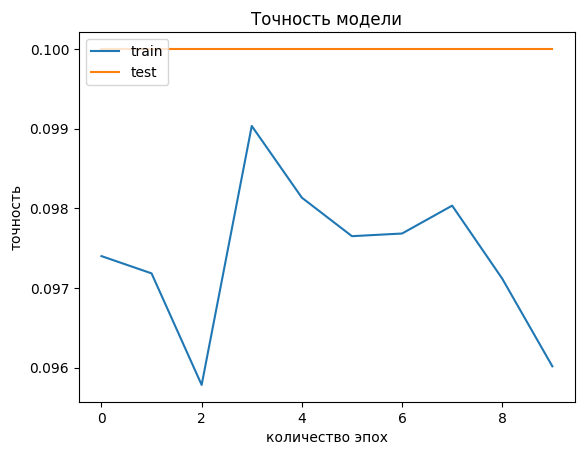

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

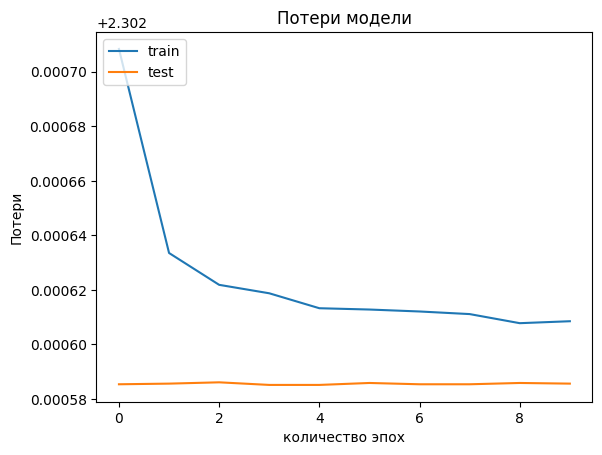

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 128)        

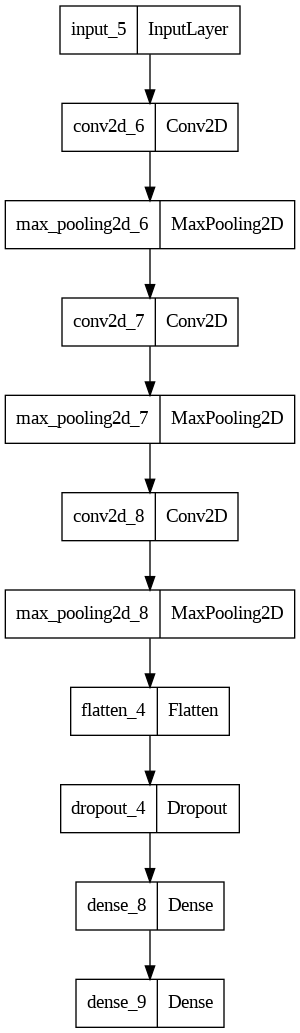

In [36]:
keras.utils.plot_model(model_4)

## Adagrad (Adaptive Gradient Algorithm) -
это алгоритм оптимизации, который используется в нейронных сетях для обновления весов и минимизации функции потерь во время обучения. Этот алгоритм основан на идее адаптивной настройки скорости обучения для каждого параметра весов, учитывая их исторические обновления.

##Ftrl (Follow-the-Regularized-Leader) -
это алгоритм оптимизации, который используется в нейронных сетях для обучения модели. Он является комбинацией методов Follow-the-Leader (FTL) и добавлением регуляризации для улучшения процесса обучения.

Ftrl используется для решения проблемы оптимизации параметров нейронной сети, путем минимизации функции потерь и регуляризации. Этот метод помогает улучшить стабильность обучения модели, уменьшить переобучение и улучшить ее обобщающую способность.

Таким образом, Ftrl в нейросетях используется для эффективной оптимизации, что помогает улучшить ее качество и точность предсказаний.

## Dropout
в нейронных сетях используется для предотвращения переобучения модели. Это достигается путем случайного "выключения" (drop) некоторых нейронов во время обучения. Это помогает модели обучаться более устойчиво и предотвращает слишком большую зависимость между нейронами, что может привести к переобучению. Dropout также помогает улучшить обобщающую способность модели, делая ее более способной к обработке новых данных.